# Architecture 1b - Multiple column, multiple timestep forecasting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
# from Data_sorting import Data_formatter_cycles

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_41364\1826588735.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [29]:
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode/Dataset_scaled.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:-1,:6]
# X = X.drop('I', axis = 1)
y = data.iloc[2:,:6]

In [32]:
X_numpy = X.values
y_numpy = y.values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

In [73]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim = 6))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(12,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
# model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3601/3601 [==============================] - 3s 775us/step - loss: 0.0582
Epoch 2/100
3601/3601 [==============================] - 3s 761us/step - loss: 8.7183e-04
Epoch 3/100
3601/3601 [==============================] - 3s 800us/step - loss: 4.3608e-04
Epoch 4/100
3601/3601 [==============================] - 3s 803us/step - loss: 2.3585e-04
Epoch 5/100
3601/3601 [==============================] - 3s 813us/step - loss: 1.6123e-04
Epoch 6/100
3601/3601 [==============================] - 3s 783us/step - loss: 1.2618e-04
Epoch 7/100
3601/3601 [==============================] - 3s 787us/step - loss: 1.0592e-04
Epoch 8/100
3601/3601 [==============================] - 3s 759us/step - loss: 9.2832e-05
Epoch 9/100
3601/3601 [==============================] - 3s 759us/step - loss: 8.1472e-05
Epoch 10/100
3601/3601 [==============================] - 3s 759us/step - loss: 7.5590e-05
Epoch 11/100
3601/3601 [==============================] - 3s 770us/step - loss: 6.9825e-05
Epoch 12/100

901/901 [==============================] - 1s 649us/step - loss: 4.8837e-06
Mean Squared Error on Test Set: 4.883747806161409e-06


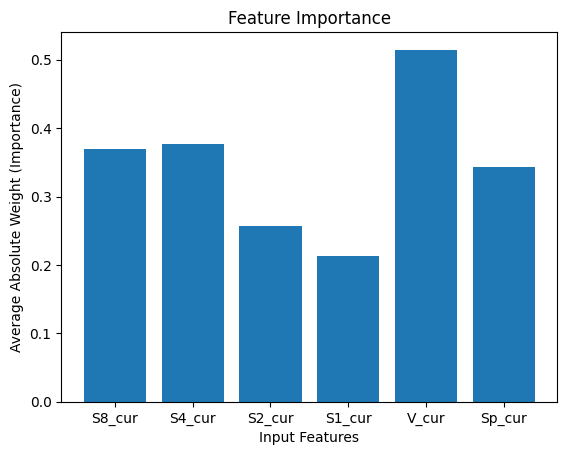

In [74]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# Get the learned weights of the first dense layer
weights = model.layers[0].get_weights()[0]

# Compute the feature importance as the average absolute weight for each feature
feature_importance = np.mean(np.abs(weights), axis=1)

# Plot the importance of each input feature
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Input Features')
plt.ylabel('Average Absolute Weight (Importance)')
plt.xticks(range(len(feature_importance)), ['S8_cur', 'S4_cur', 'S2_cur', 'S1_cur', 'V_cur', 'Sp_cur'])
plt.title('Feature Importance')
plt.show()

In [75]:
start = 1500

input = np.array([X_numpy[start]])

prediction  = model.predict(input)

print(input)

print(prediction)

1/1 [==============================] - 0s 46ms/step
[[ 2.75583962 -2.76949624 -0.92914884 -0.23244107  2.2826067  -0.92512734]]
[[ 2.7561178  -2.7692575  -0.92910004 -0.23488544  2.2831187  -0.92472816]]


In [76]:
no_predictions = 2000

start = 1500

input = np.array([X_numpy[start]])

output = []

scale = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode/Scales.xlsx')

for i in range(no_predictions):
    
    next_prediction_array = model.predict(input)

    input = next_prediction_array

    # print(input)

    output.append(input[0])


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


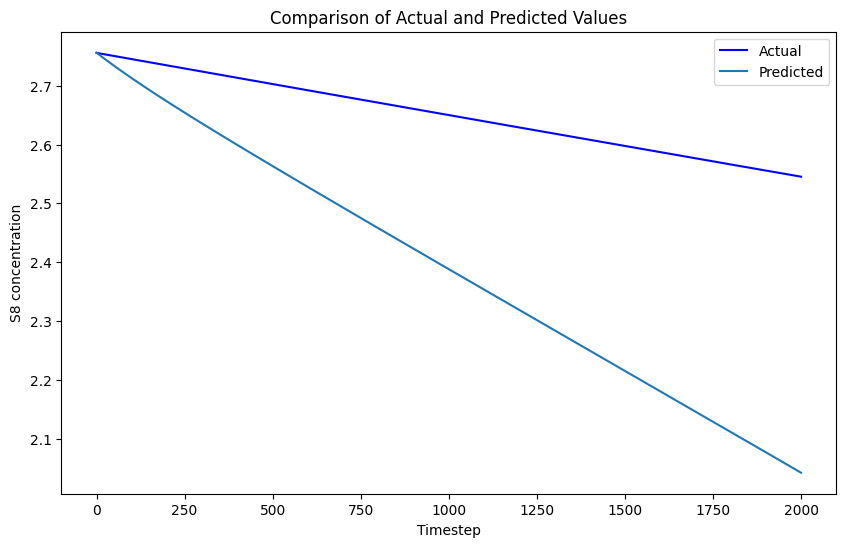

In [77]:
plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[start + j])

# Extracting the first value from each entry in plot_actual
first_values_actual = [item[0] for item in plot_actual]

# Extracting the first value from each predicted array in output
first_values_predicted = [item[0] for item in output]

# Create a range for the x-axis
x_range = range(len(first_values_actual))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, first_values_actual, label='Actual', c = 'b')
plt.plot(x_range, first_values_predicted, label='Predicted')

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Timestep')
plt.ylabel('S8 concentration')
plt.legend()

# Show plot
plt.show()

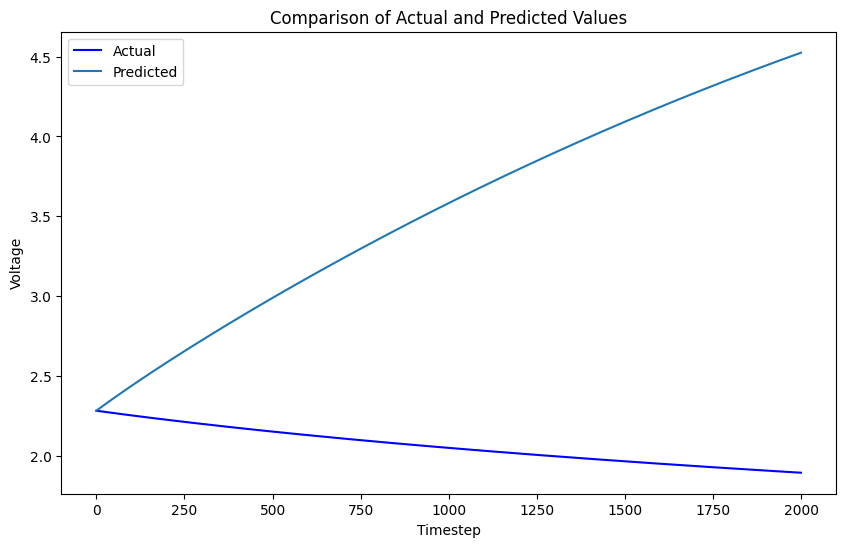

In [78]:
plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[start + j])

# Extracting the first value from each entry in plot_actual
first_values_actual = [item[4] for item in plot_actual]

# Extracting the first value from each predicted array in output
first_values_predicted = [item[4] for item in output]

# Create a range for the x-axis
x_range = range(len(first_values_actual))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, first_values_actual, label='Actual', c = 'b')
plt.plot(x_range, first_values_predicted, label='Predicted')

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Timestep')
plt.ylabel('Voltage')
plt.legend()

# Show plot
plt.show()

In [3]:
no_predictions = 50

start = 1500

input = np.array([X_numpy[start]])

output = []

scale = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode/Scales.xlsx')

for i in range(no_predictions):
    
    next_prediction_array = model.predict(input)

    input = next_prediction_array

    # print(input)

    output.append(input)


plot_actual = []

for j in range(no_predictions):
    plot_actual.append(X_numpy[start + j])

# print(plot_actual)

# print(output)

# Extracting the first value from each entry in plot_actual
first_values_actual = [item[0] for item in plot_actual]

# Extracting the first value from each predicted array in output
first_values_predicted = [item[0][0] for item in output]


import matplotlib.pyplot as plt

# Create a range for the x-axis
x_range = range(len(first_values_actual))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, first_values_actual, label='Actual', marker='o', linestyle='-')
plt.plot(x_range, first_values_predicted, label='Predicted', marker='x', linestyle='--')

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('First Value')
plt.legend()

# Show plot
plt.show()

NameError: name 'X_numpy' is not defined